# Importing Libraries and DataSet Exploration

In [65]:
## Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## function for bold writing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Reading the csv DataSet
Restaurant_Details = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
## We need list of Indian restaurants only.
## Country code of India in 1 in the document
Indian_Restaurant_Details = Restaurant_Details[Restaurant_Details['Country Code'] == 1]

# Indian Restaurant Details

In [66]:
Indian_Restaurant_Details.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [67]:
Indian_Restaurant_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order men

In [68]:
# As we can see from the previous result Dataset does not contain any NULL values

In [69]:
Indian_Restaurant_Details.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


## #1.Bar graph of number of restaurants present in Delhi NCR vs Rest of India.

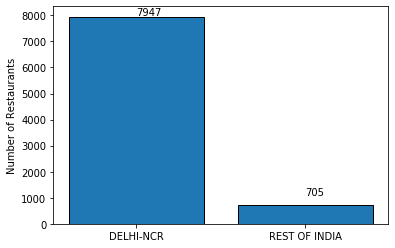

In [70]:
Delhi_Ncr = 0
Other_Cities = 0

for i in range(Indian_Restaurant_Details.shape[0]):
    city = Indian_Restaurant_Details.iloc[i, 3]
    if city == 'New Delhi' or city == 'Ghaziabad' or city == 'Noida' or city == 'Gurgaon' or city == 'Faridabad':
        Delhi_Ncr += 1
    else:
        Other_Cities += 1

## Plotting Bar graph
plt.bar(['DELHI-NCR', 'REST OF INDIA'],[Delhi_Ncr, Other_Cities], edgecolor = "black")
plt.text(0, 8000, "7947")
plt.text(1, 1100, "705")
plt.ylabel("Number of Restaurants")
plt.show()

## #2.  Cuisines which can not be found in restaurant of Delhi NCR but can be found in rest of India

In [71]:
Delhi_Ncr_cuisines = []
other_city_cuisines = []
for i in range(df.shape[0]):
    city = Indian_Restaurant_Details.iloc[i, 3]
    cuisine_list = Indian_Restaurant_Details.iloc[i, 9].split(',')
    if city == 'New Delhi' or city == 'Ghaziabad' or city == 'Noida' or city == 'Gurgaon' or city == 'Faridabad':
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in Delhi_Ncr_cuisines:
                Delhi_Ncr_cuisines.append(cuisine)
    else:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            if cuisine not in other_city_cuisines:
                other_city_cuisines.append(cuisine)
        
## Cuisines which are not present in restaurant of Delhi NCR but present in rest of India according to the csv
exclude = []
for cuisine in others_cuisines:
    if cuisine not in Delhi_Ncr_cuisines:
        exclude.append(cuisine)
        
## exclude = ['German', 'Malwani', 'BBQ', 'Cajun']
## ZOMATO API KEY : f860692f32bb35a53c1adf8b96b006c2

import requests
data = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                    headers = {'user-key' : 'f860692f32bb35a53c1adf8b96b006c2'},
                    params = {'city_id' : 1})

ncr_cuisine = data.json()['cuisines']
ncr_cuisine_list = []

## getting cuisines list from Zomato API
for cuisine_list in ncr_cuisine:
    cuisine = cuisine_list['cuisine']['cuisine_name']
    if cuisine not in ncr_cuisine_list:
        ncr_cui_list.append(cuisine)
        
printmd("**The cuisines which are not present in Delhi-NCR restaurants**")
i = 1
for cusine in exclude:
    if cusine not in ncr_cuisine_list:
        print(i, end = "")
        print(".", cusine)
        i += 1

**The cuisines which are not present in Delhi-NCR restaurants**

1. German
2. Malwani
3. BBQ
4. Cajun


   ## #3. Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of         India

**Top 10 cuisines served by maximum number of restaurants in Delhi NCR**

1.North Indian
2.Chinese
3.Fast Food
4.Mughlai
5.Bakery
6.South Indian
7.Continental
8.Desserts
9.Street Food
10.Italian
------------------------------------------------------------------------------------------------------


**Top 10 cuisines served by maximum number of restaurants in rest of India**

1.North Indian
2.Chinese
3.Continental
4.Italian
5.Cafe
6.Fast Food
7.South Indian
8.Mughlai
9.Desserts
10.Mexican



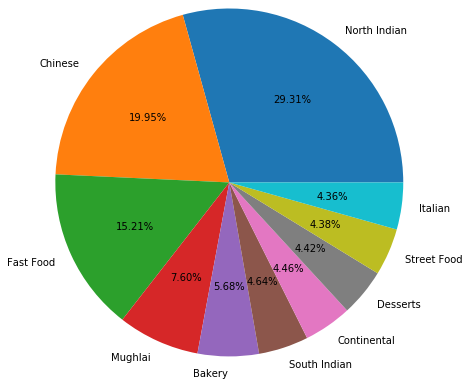

**Top 10 cuisines served by maximum number of restaurants in Delhi NCR**

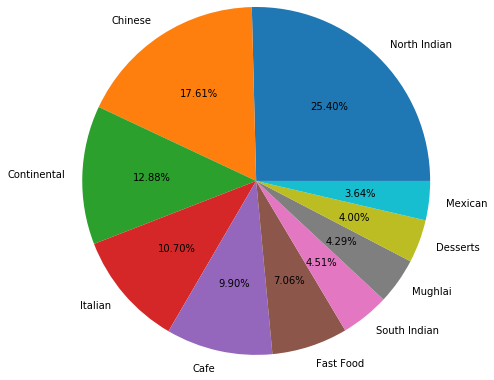

**Top 10 cuisines served by maximum number of restaurants in rest of India**

In [72]:
Delhi_Ncr_cuisines = dict()
others_cuisines = dict()
for i in range(Indian_Restaurant_Details.shape[0]):
    city = Indian_Restaurant_Details.iloc[i, 3]
    cuisine_list = Indian_Restaurant_Details.iloc[i, 9].split(',')
    if city == 'New Delhi' or city == 'Ghaziabad' or city == 'Noida' or city == 'Gurgaon' or city == 'Faridabad':
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            Delhi_Ncr_cuisines[cuisine] = Delhi_Ncr_cuisines.get(cuisine, 0) + 1
    else:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            others_cuisines[cuisine] = others_cuisines.get(cuisine, 0) + 1

sorted_Delhi_Ncr_cuisines = sorted(Delhi_Ncr_cuisines.items(), key = lambda key : key[1])
sorted_others_cuisines = sorted(others_cuisines.items(), key = lambda key : key[1])

delhi_top_cuisines = []
delhi_top_cuisines_freq = []
others_top_cuisines = []
others_top_cuisines_freq = []
for i in range(1, 11):
    delhi_top_cuisines.append(sorted_Delhi_Ncr_cuisines[len(sorted_Delhi_Ncr_cuisines) - i][0])
    delhi_top_cuisines_freq.append(sorted_Delhi_Ncr_cuisines[len(sorted_Delhi_Ncr_cuisines) - i][1])
    others_top_cuisines.append(sorted_others_cuisines[len(sorted_others_cuisines) - i][0])
    others_top_cuisines_freq.append(sorted_others_cuisines[len(sorted_others_cuisines) - i][1])
    
printmd("**Top 10 cuisines served by maximum number of restaurants in Delhi NCR**")
i = 1
for e in delhi_top_cuisines:
    print(i, end = ".")
    print(e)
    i += 1
print("------------------------------------------------------------------------------------------------------")
printmd("**Top 10 cuisines served by maximum number of restaurants in rest of India**")
i = 1
for e in others_top_cuisines:
    print(i, end = ".")
    print(e)
    i += 1


print()
plt.pie(delhi_top_cuisines_freq, labels = delhi_top_cuisines, autopct = "%.2f%%", radius = 2)
plt.show()
printmd("**Top 10 cuisines served by maximum number of restaurants in Delhi NCR**")
print()
print()
plt.pie(others_top_cuisines_freq, labels = others_top_cuisines, autopct = "%.2f%%", radius = 2)
plt.show()
printmd("**Top 10 cuisines served by maximum number of restaurants in rest of India**")

## short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India

**The Cuisines Which are available in restaurants both in Delhi-NCR and Rest of India are**

1. Chinese, 2. Fast Food, 3. Bakery, 4. North Indian, 5. Mithai, 6. Mughlai, 7. Cafe, 8. Burger, 9. South Indian, 10. Gujarati, 11. Rajasthani, 12. Thai, 13. Desserts, 14. American, 15. Salad, 16. Healthy Food, 17. Ice Cream, 18. Continental, 19. Beverages, 20. Italian, 21. Pizza, 22. Street Food, 23. Mexican, 24. Juices, 25. Asian, 26. Seafood, 27. Biryani, 28. Mediterranean, 29. Finger Food, 30. Kerala, 31. Japanese, 32. Lebanese, 33. Tea, 34. European, 35. Burmese, 36. Arabian, 37. Steak, 38. Bengali, 39. Modern Indian, 40. Portuguese, 41. African, 42. Parsi, 43. Malaysian, 44. Vietnamese, 45. Greek, 46. Lucknowi, 47. Tibetan, 48. Korean, 49. Awadhi, 50. Hyderabadi, 51. Tex-Mex, 52. North Eastern, 53. Chettinad, 54. Middle Eastern, 55. Indonesian, 56. Goan, 57. Charcoal Grill, 58. Andhra, 59. Indian, 60. French, 61. Maharashtrian, 62. British, 63. Spanish, 64. Sandwich, 65. Armenian, 66. Mangalorean, 


**The Cuisines Which are available in restaurants of Delhi-NCR and not in Rest of India are**

1. Raw Meats, 2. Belgian, 3. Kashmiri, 4. Sushi, 5. South American, 6. Persian, 7. Iranian, 8. Nepalese, 9. Drinks Only, 10. Pakistani, 11. Oriya, 12. Bihari, 13. Afghani, 14. Assamese, 15. Cuisine Varies, 16. Turkish, 17. Moroccan, 18. Naga, 19. Deli, 20. Sri Lankan, 


**The Cuisines Which are not available in restaurants of Delhi-NCR but in Rest of India are**

1. German, 2. Malwani, 3. BBQ, 4. Cajun, 

**Top 15 cuisines served by maximum number of restaurants in Delhi NCR**

1.North Indian, 2.Chinese, 3.Fast Food, 4.Mughlai, 5.Bakery, 6.South Indian, 7.Continental, 8.Desserts, 9.Street Food, 10.Italian, 11.Cafe, 12.Mithai, 13.Pizza, 14.Ice Cream, 15.Beverages, 

**Top 15 cuisines served by maximum number of restaurants in rest of India**

1.North Indian, 2.Chinese, 3.Continental, 4.Italian, 5.Cafe, 6.Fast Food, 7.South Indian, 8.Mughlai, 9.Desserts, 10.Mexican, 11.Asian, 12.American, 13.European, 14.Pizza, 15.Mediterranean, 


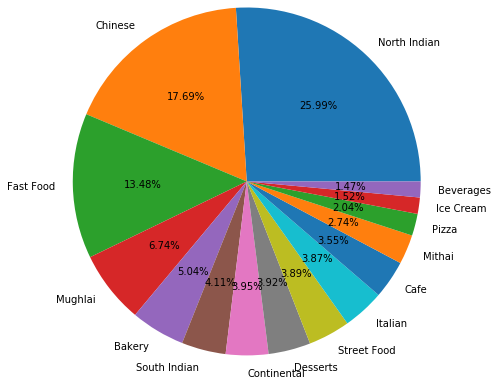

**Top 15 cuisines served by maximum number of restaurants in Delhi NCR**

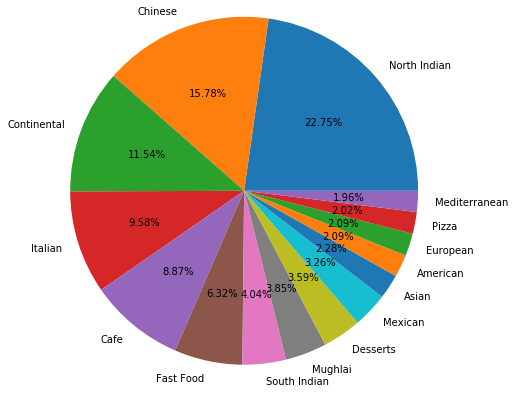

**Top 15 cuisines served by maximum number of restaurants in rest of India**

In [73]:
Delhi_Ncr_cuisines = []
others_cuisines = []
for i in range(Indian_Restaurant_Details.shape[0]):
    city = Indian_Restaurant_Details.iloc[i, 3]
    cuisine_list = Indian_Restaurant_Details.iloc[i, 9].split(',')
    if city == 'New Delhi' or city == 'Ghaziabad' or city == 'Noida' or city == 'Gurgaon' or city == 'Faridabad':
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            Delhi_Ncr_cuisines.append(cuisine)
    else:
        for j in range(len(cuisine_list)):
            cuisine = cuisine_list[j].strip()
            others_cuisines.append(cuisine)

common = []
diff_ncr = []
diff_other = []
for cuisine in Delhi_Ncr_cuisines:
    if cuisine in others_cuisines and cuisine not in common:
        common.append(cuisine)
    elif cuisine not in others_cuisines and cuisine not in diff_ncr:
        diff_ncr.append(cuisine)
        
for cuisine in others_cuisines:
    if cuisine not in Delhi_Ncr_cuisines and cuisine not in diff_other:
        diff_other.append(cuisine)
        
printmd("**The Cuisines Which are available in restaurants both in Delhi-NCR and Rest of India are**")
i = 1
for e in common:
    print(i, end = ". ")
    print(e, end = ", ")
    i += 1
    
i = 1
print()
printmd("**The Cuisines Which are available in restaurants of Delhi-NCR and not in Rest of India are**")
for e in diff_ncr:
    print(i, end = ". ")
    print(e, end = ", ")
    i += 1
    
print()
i = 1
printmd("**The Cuisines Which are not available in restaurants of Delhi-NCR but in Rest of India are**")
for e in diff_other:
    print(i, end = ". ")
    print(e, end = ", ")
    i += 1

    

Delhi_Ncr_cuisines = dict()
others_cuisines = dict()
for i in range(Indian_Restaurant_Details.shape[0]):
    c = Indian_Restaurant_Details.iloc[i, 3]
    cuisine = df.iloc[i, 9].split(',')
    if c == 'New Delhi' or c == 'Ghaziabad' or c == 'Noida' or c == 'Gurgaon' or c == 'Faridabad':
        for j in range(len(cuisine)):
            e = cuisine[j].strip()
            Delhi_Ncr_cuisines[e] = Delhi_Ncr_cuisines.get(e, 0) + 1
    else:
        for j in range(len(cuisine)):
            e = cuisine[j].strip()
            others_cuisines[e] = others_cuisines.get(e, 0) + 1

sorted_Delhi_Ncr_cuisines = sorted(Delhi_Ncr_cuisines.items(), key= lambda key : key[1])
sorted_others_cuisines = sorted(others_cuisines.items(), key= lambda key : key[1])

delhi_top_cuisines = []
delhi_top_cuisines_freq = []
others_top_cuisines = []
others_top_cuisines_freq = []
for i in range(1, 16):
    delhi_top_cuisines.append(sorted_Delhi_Ncr_cuisines[len(sorted_Delhi_Ncr_cuisines) - i][0])
    delhi_top_cuisines_freq.append(sorted_Delhi_Ncr_cuisines[len(sorted_Delhi_Ncr_cuisines) - i][1])
    others_top_cuisines.append(sorted_others_cuisines[len(sorted_others_cuisines) - i][0])
    others_top_cuisines_freq.append(sorted_others_cuisines[len(sorted_others_cuisines) - i][1])
    
printmd("**Top 15 cuisines served by maximum number of restaurants in Delhi NCR**")
i = 1
for e in delhi_top_cuisines:
    print(i, end = ".")
    print(e, end = ", ")
    i += 1

printmd("**Top 15 cuisines served by maximum number of restaurants in rest of India**")
i = 1
for e in others_top_cuisines:
    print(i, end = ".")
    print(e, end = ", ")
    i += 1
    
print()
plt.pie(delhi_top_cuisines_freq, labels = delhi_top_cuisines, autopct = "%.2f%%", radius = 2)
plt.show()
printmd("**Top 15 cuisines served by maximum number of restaurants in Delhi NCR**")
print()
print()
plt.pie(others_top_cuisines_freq, labels = others_top_cuisines, autopct = "%.2f%%", radius = 2)
plt.show()
printmd("**Top 15 cuisines served by maximum number of restaurants in rest of India**")

# short detailed analysis of how the rating is affected by restaurant due to diff. features

## #1. Number of Votes given to Restaurant

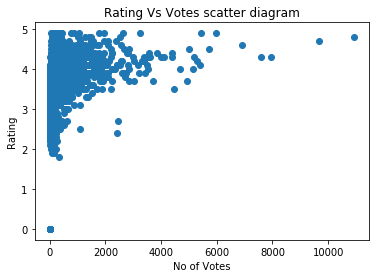

**From the scatter diagram we can conclude that restaurants having less number of votes has a greater possibility of getting low rating. But as the number of votes increases, the rating sifts towards the higher value**

In [74]:
no_of_votes = np.array(df.Votes, dtype = int)
rating = np.array(Indian_Restaurant_Details['Aggregate rating'], dtype = float)
plt.scatter(no_of_votes, rating)
plt.xlabel("No of Votes")
plt.ylabel("Rating")
plt.title("Rating Vs Votes scatter diagram")
plt.show()

printmd("**From the scatter diagram we can conclude that restaurants having less number of votes has a greater possibility of getting low rating. But as the number of votes increases, the rating sifts towards the higher value**")

## #2. Restaurant serving more number of cuisines.

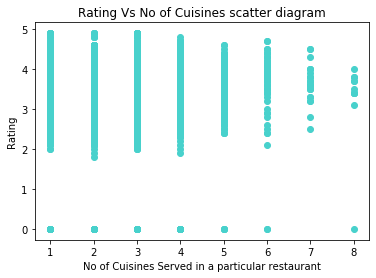

**From above scatter diagram we can conclude that restaurants serving more cuisines have less number of customers compared to the restaurants serving less variety of cuisines. But the average rating in restaurants serving more cuisines not so high as well as not very low but on the other hand restaurants serving less variety of cuisines has a range of rating from very low to very high.**

In [75]:
def f(s):
    if type(s) == str:
        li = s.split(',')
        return len(li)
    else:
        return 0
    
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

df['no_of_cuisines'] = df.Cuisines.apply(f)
np_cuisines = np.array(df['no_of_cuisines'], dtype = int)
rating = np.array(df['Aggregate rating'], dtype = float)
plt.scatter(np_cuisines, rating, color = 'mediumturquoise')
plt.xlabel("No of Cuisines Served in a particular restaurant")
plt.ylabel("Rating")
plt.title("Rating Vs No of Cuisines scatter diagram")
plt.show()

printmd("**From above scatter diagram we can conclude that restaurants serving more cuisines have less number of customers compared to the restaurants serving less variety of cuisines. But the average rating in restaurants serving more cuisines not so high as well as not very low but on the other hand restaurants serving less variety of cuisines has a range of rating from very low to very high.**")

## #3. Average Cost of Restaurant

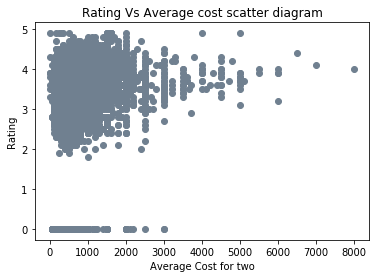

**From the scatter diagram we can see that restaurants having less average cost have wide range of rating distribution but restaurants having high average cost have less range of rating and also the number of lower rating decreases**

In [76]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

avg_cost = np.array(df['Average Cost for two'])
rating = np.array(df['Aggregate rating'], dtype = float)
plt.scatter(avg_cost, rating, color = 'slategrey')
plt.xlabel("Average Cost for two")
plt.ylabel("Rating")
plt.title("Rating Vs Average cost scatter diagram")
plt.show()

printmd("**From the scatter diagram we can see that restaurants having less average cost have wide range of rating distribution but restaurants having high average cost have less range of rating and also the number of lower rating decreases**")

## #4. Restaurant serving some specific cuisines.

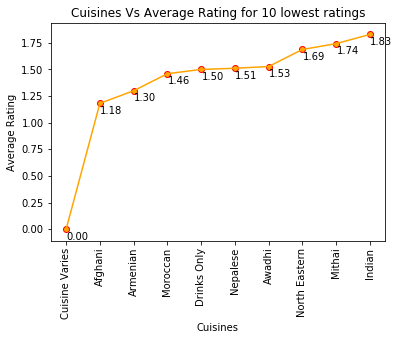

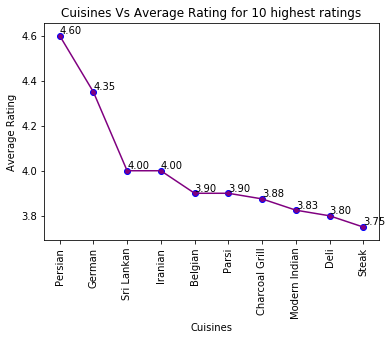

*****From the graph analysis we can conclude that Cuisine Varies ( 0.0 ), Afghani ( 1.1818181818181819 ), Armenian ( 1.3 ), Moroccan ( 1.46 ), Drinks Only ( 1.5 ), Nepalese ( 1.511111111111111 ), Awadhi ( 1.5272727272727273 ), North Eastern ( 1.6875 ), Mithai ( 1.7423684210526316 ), Indian ( 1.8285714285714287 ) are having lowest ratings.


*****From the graph analysis we can conclude that Persian ( 4.6 ), German ( 4.35 ), Sri Lankan ( 4.0 ), Iranian ( 4.0 ), Belgian ( 3.9 ), Parsi ( 3.9 ), Charcoal Grill ( 3.875 ), Modern Indian ( 3.825 ), Deli ( 3.8 ), Steak ( 3.75 ) are having highest ratings.


In [77]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

cui_rating = dict()
for i in range(df.shape[0]):
    if type(df.iloc[i, 9]) == float:
        continue
    cuisines_li = df.iloc[i, 9].split(',')
    for e in cuisines_li:
        e = e.strip()
        if e in cui_rating:
            cui_rating[e].append(int(df.iloc[i, 17]))
        else:
            cui_rating[e] = [df.iloc[i, 17]]
            
for e in cui_rating:
    cui_rating[e] = sum(cui_rating[e])/len(cui_rating[e])
cui_rat = sorted(cui_rating.items(), key = lambda key : key[1])
cuisines1 = list()
avg_rating1 = list()
cuisines2 = list()
avg_rating2 = list()
for i in range(10):
    cuisines1.append(cui_rat[i][0])
    avg_rating1.append(cui_rat[i][1])
    cuisines2.append(cui_rat[len(cui_rat) - i - 1][0])
    avg_rating2.append(cui_rat[len(cui_rat) - i - 1][1])
    
## Graph for 10 lowest ratings
plt.scatter(cuisines1, avg_rating1, color = 'orange',edgecolor = 'red')
plt.plot(cuisines1, avg_rating1, color = 'orange')
for i in range(10):
    plt.text(i + 0.01, avg_rating1[i] - 0.1, format(avg_rating1[i], ".2f"))
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.xlabel('Cuisines')
plt.title('Cuisines Vs Average Rating for 10 lowest ratings')
plt.show()

## Graph for 10 highest ratings
plt.scatter(cuisines2, avg_rating2, color = 'purple', edgecolor = 'blue')
plt.plot(cuisines2, avg_rating2, color = 'purple')
for i in range(10):
    plt.text(i, avg_rating2[i] + 0.01, format(avg_rating2[i], ".2f"))
plt.xticks(rotation = 90)
plt.ylabel('Average Rating')
plt.xlabel('Cuisines')
plt.title('Cuisines Vs Average Rating for 10 highest ratings')
plt.show()
    
    
print("*****From the graph analysis we can conclude that ", end = "")
for e in cuisines1:
    if e == cuisines1[len(cuisines1) - 1]:
        print(e, '(',cui_rating[e], ')', end = " ")
    else:
        print(e, '(',cui_rating[e], ')', end = ", ")
    
print("are having lowest ratings.")

print()
print()

print("*****From the graph analysis we can conclude that ", end = "")
for e in cuisines2:
    if e == cuisines2[len(cuisines2) - 1]:
        print(e,'(',cui_rating[e], ')',  end = " ")
    else:
        print(e, '(',cui_rating[e], ')', end = ", ")
    
print("are having highest ratings.")

## Top 10 localities with more weighted restaurant rating

**Top 10 locations with higherst Weighted Ratings are**

Aminabad 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7


**Pie chart of top 10 locations with highest Weighted Ratings**

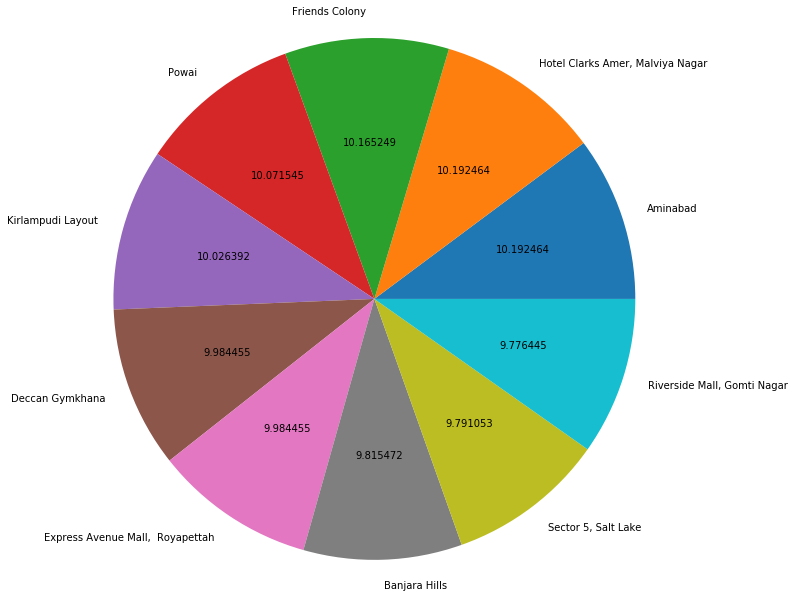

In [78]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

## creating another column of votes*rating
df['Total Rating'] = df['Votes']*df['Aggregate rating']
weighted_rating_dic = dict()
for i in range(df.shape[0]):
    weighted_rating_dic[df.iloc[i]['Locality']]=weighted_rating_dic.get(df.iloc[i]['Locality'],0)+df.iloc[i]['Total Rating']
    
## calculating weighted rating for each locality
for e in weighted_rating_dic:
    if sum(df[df.Locality == e].Votes) != 0:
        weighted_rating_dic[e] = weighted_rating_dic[e]/sum(df[df.Locality == e].Votes)

## sorting based on weighted rating for each locality
weighted_rating_dic = sorted(weighted_rating_dic.items(), key = lambda key : key[1])
top_10_locations = []
top_10_we = []
for i in range(1, 11):
    top_10_locations.append(weighted_rating_dic[len(weighted_rating_dic) - i][0])
    top_10_we.append(weighted_rating_dic[len(weighted_rating_dic) - i][1])
    
## Results
printmd("**Top 10 locations with higherst Weighted Ratings are**")
for i in range(10):
    print(top_10_locations[i], top_10_we[i])
    
## Graph
plt.pie(top_10_we, labels = top_10_locations, autopct = "%1f", radius = 3)
printmd("**Pie chart of top 10 locations with highest Weighted Ratings**")
print()
plt.show()

## # Bar graph of top 15 restaurants having a maximum number of outlets

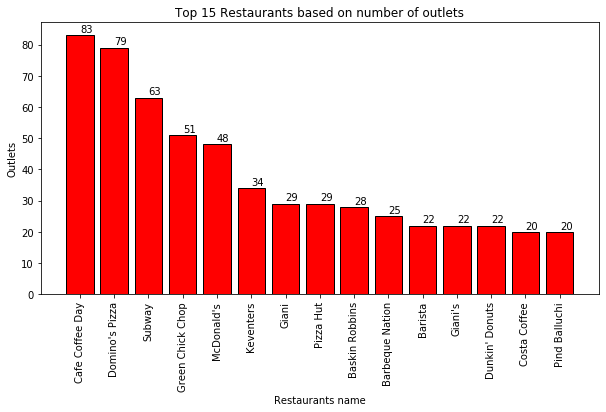

In [79]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

outlet_dic = dict()

for i in range(df.shape[0]):
    outlet_dic[df.iloc[i]['Restaurant Name']] = outlet_dic.get(df.iloc[i]['Restaurant Name'], 0) + 1
    
sorted_outlet = sorted(outlet_dic.items(), key = lambda key : key[1])

top_15 = list(sorted_outlet[len(sorted_outlet) - i][0] for i in range(1, 16))
no_outlet = list(sorted_outlet[len(sorted_outlet) - i][1] for i in range(1, 16))
                     
plt.figure (figsize = (10, 5))
plt.bar(top_15, no_outlet, edgecolor = 'black', color = 'red')
plt.xticks(rotation = 90)
plt.xlabel("Restaurants name")
plt.ylabel("Outlets")
plt.title("Top 15 Restaurants based on number of outlets")
for i in range(15):
    plt.text(i, no_outlet[i] + 1, no_outlet[i])
plt.show()

## # The histogram of aggregate rating of restaurant 

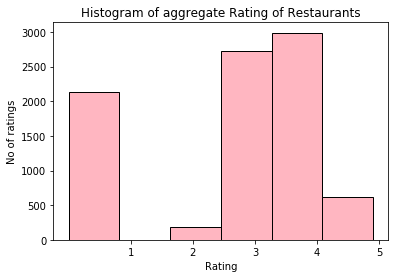

In [80]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

rating = np.array(df['Aggregate rating'], dtype = float)
res = np.array(df['Restaurant Name'], dtype = str)

plt.hist(rating, bins = 6, edgecolor = 'black', color = 'lightpink')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Rating")
plt.ylabel("No of ratings")
plt.title("Histogram of aggregate Rating of Restaurants")
plt.show()

## # Bar graph of top 10 restaurants with the highest number of votes

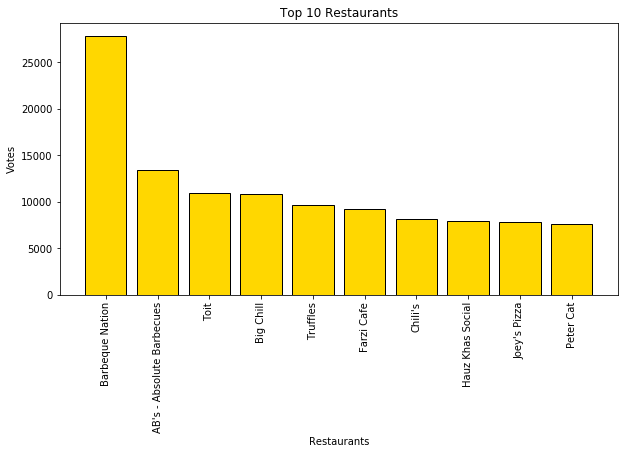

In [81]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]

df_res_vote = dict()
for i in range(df.shape[0]):
    df_res_vote[df.iloc[i]['Restaurant Name']] = df_res_vote.get(df.iloc[i]['Restaurant Name'], 0) + df.iloc[i]['Votes']
sorted_res_vote = sorted(df_res_vote.items(), key = lambda key : key[1])

res = []
vote = []
for i in range(1, 11):
    res.append(sorted_res_vote[len(sorted_res_vote) - i][0])
    vote.append(sorted_res_vote[len(sorted_res_vote) - i][1])
    
plt.figure(figsize = (10, 5))
plt.bar(res, vote, edgecolor = 'black', color = 'gold')
plt.xlabel("Restaurants")
plt.xticks(rotation = 90)
plt.ylabel("Votes")
plt.title("Top 10 Restaurants")
plt.show()

## # Pie graph of top 10 cuisines present in restaurants in the USA.

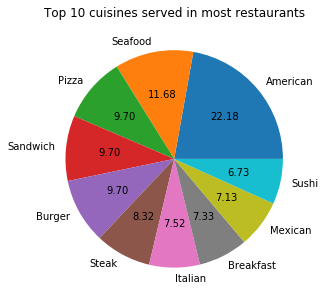

In [82]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 216]

cuisines = dict()
for c in df.Cuisines:
    if type(c) == float:
        continue
    li = c.split(',')
    for e in li:
        e = e.strip()
        cuisines[e] = cuisines.get(e, 0) + 1
        
top_cuisines = sorted(cuisines.items(), key = lambda key : key[1])
cuisines = []
no_of_res = []
for i in range(1, 11):
    cuisines.append(top_cuisines[len(top_cuisines) - i][0])
    no_of_res.append(top_cuisines[len(top_cuisines) - i][1])
    
plt.figure(figsize = (10, 5))
plt.pie(no_of_res, labels = cuisines, autopct = "%1.2f")
plt.title("Top 10 cuisines served in most restaurants")
plt.show()

## #. Bubble graph of a number of Restaurants present in the city of India 

Here bubble size represent weighted ratings of the restaurants



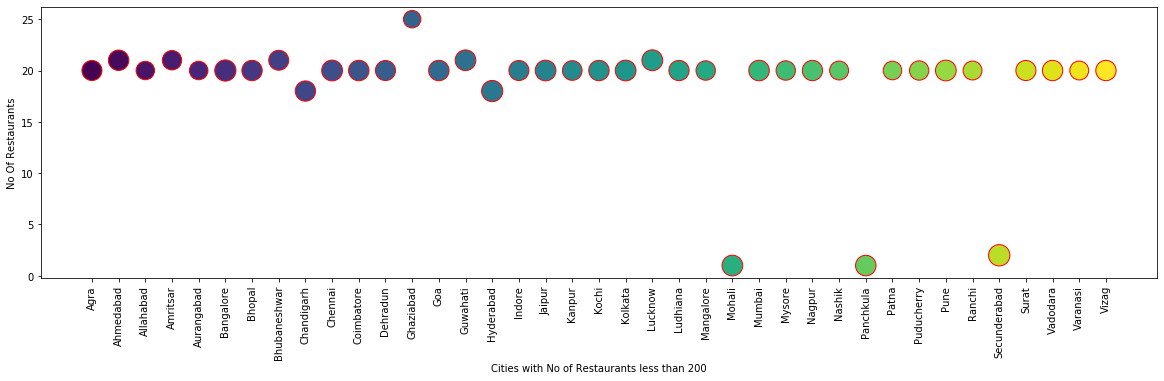

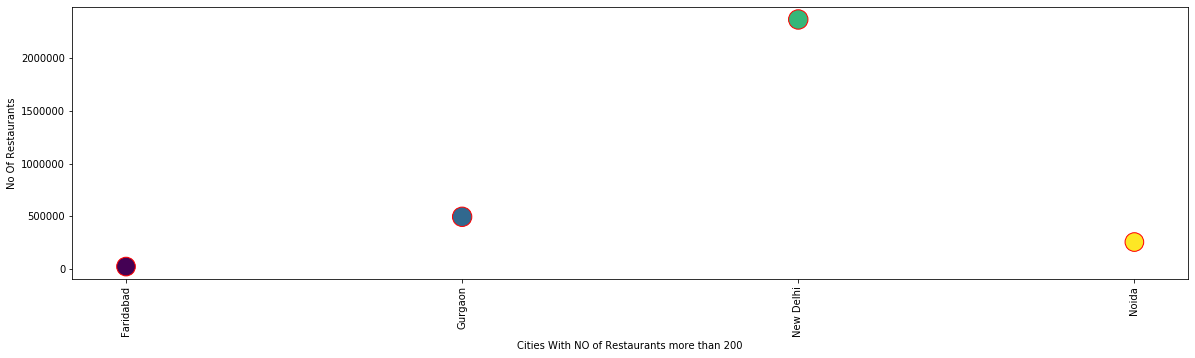

In [83]:
## Reading the csv DataSet
df = pd.read_csv("zomato.csv", skipinitialspace = True, encoding = "ISO-8859-1")
df = df[df['Country Code'] == 1]
df_city = dict()
df_oth = dict()
for e in df.City:
    if e == 'Noida' or e == 'New Delhi' or e == 'Gurgaon' or e == 'Faridabad':
        df_oth[e] = df_oth.get(e, 0) + 1
    else:
        df_city[e] = df_city.get(e, 0) + 1
    
total_votes = sum(df.Votes)
df['Total Rating'] = df['Votes']*df['Aggregate rating']
weighted_rating_dic = dict()
oth = dict()
for i in range(df.shape[0]):
    e = df.iloc[i]['City']
    if e == 'Noida' or e == 'New Delhi' or e == 'Gurgaon' or e == 'Faridabad':
        oth[e] = oth.get(e, 0) + df.iloc[i]['Total Rating']
    else:
        weighted_rating_dic[e]=weighted_rating_dic.get(e,0)+df.iloc[i]['Total Rating']

bubble1 = []
bubble2 = []
for e in weighted_rating_dic:
    bubble1.append((weighted_rating_dic[e]/sum(df[df.City == e].Votes))*100)
for e in oth:
    bubble2.append((oth[e]/sum(df[df.City == e].Votes))*100)
    
city1 = []
res1 = []
for e in df_city:
    city1.append(e)
    res1.append(df_city[e])
    
city2 = []
res2 = []
for e in oth:
    city2.append(e)
    res2.append(oth[e])
    
print("Here bubble size represent weighted ratings of the restaurants")
print()
plt.figure(figsize = (20, 5))
plt.scatter(city1, res1, c = np.arange(len(bubble1)), edgecolor = 'red', s = bubble1)
plt.xlabel("Cities with No of Restaurants less than 200")
plt.ylabel("No Of Restaurants")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (20, 5))
plt.scatter(city2, res2, c = np.arange(len(bubble2)), edgecolor = 'red', s = bubble2)
plt.xlabel("Cities With NO of Restaurants more than 200")
plt.ylabel("No Of Restaurants")
plt.xticks(rotation = 90)
plt.show()

## JUSTIFICATION:
###    The above analysis shows the number of restaurants in delhi-ncr and rest of India based on which we can see delhi-ncr has more number of restaurants than rest of India. So, this dataset will helpful to know competitions in restaurant business and also demand of high quality foods in different areas. It also shows top selled or most loved cuisines in India, more specifically in Delhi-NCR and in Rest of India. I have analysed the relation of ratings and cuisines such as the cuisines that are rated high. This analysis will be very helpful while selecting menu of any restaurant. And I have also described how number of votes , locality and average cost affects customer satisfaction.  Overall the above data set analysis will give a clear picture of food buisness in India.